In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows' , None)
df= pd.read_csv(r"D:\uni\Teaching Assistant\Statistical Quality Control\1400-2\2. Problem Solving - Plotting Charts\Admission_Predict.csv")
df=df.drop('Serial No.',axis=1)
# del df['Serial No.']
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [2]:
average=np.mean(df['GRE Score'])
median=np.median(df['GRE Score'])
maximum=max(df['GRE Score'])
minimum=min(df['GRE Score'])
first_Q , third_Q=df['GRE Score'].quantile([0.25 , 0.75])
print('mean: ' ,average ,'\nmedian: ' , median, '\nmax: ',maximum , '\nmin: ', minimum , '\nfirst Quantile:' , first_Q ,'\nthird Q:' , third_Q)


mean:  316.8075 
median:  317.0 
max:  340 
min:  290 
first Quantile: 308.0 
third Q: 325.0


<IPython.core.display.Javascript object>


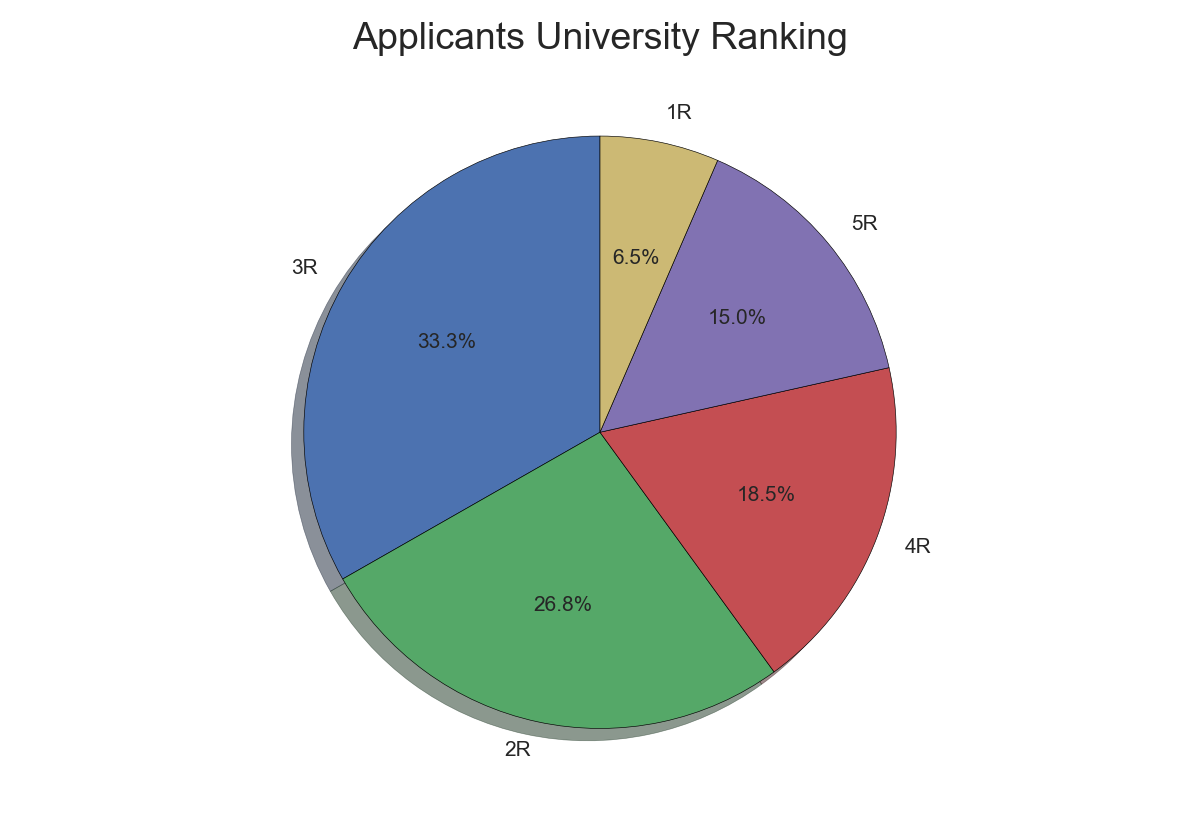

In [3]:
plt.style.use('seaborn')
df.groupby('University Rating').count()
slices=[133 , 107 ,74,60 , 26]
labels=['3R' , '2R' , '4R' , '5R' , '1R']
plt.figure()
plt.pie(slices , labels=labels , shadow=True , startangle=90 , autopct='%1.1f%%' , wedgeprops={'edgecolor':'black'})
plt.title('Applicants University Ranking' , fontsize=18)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


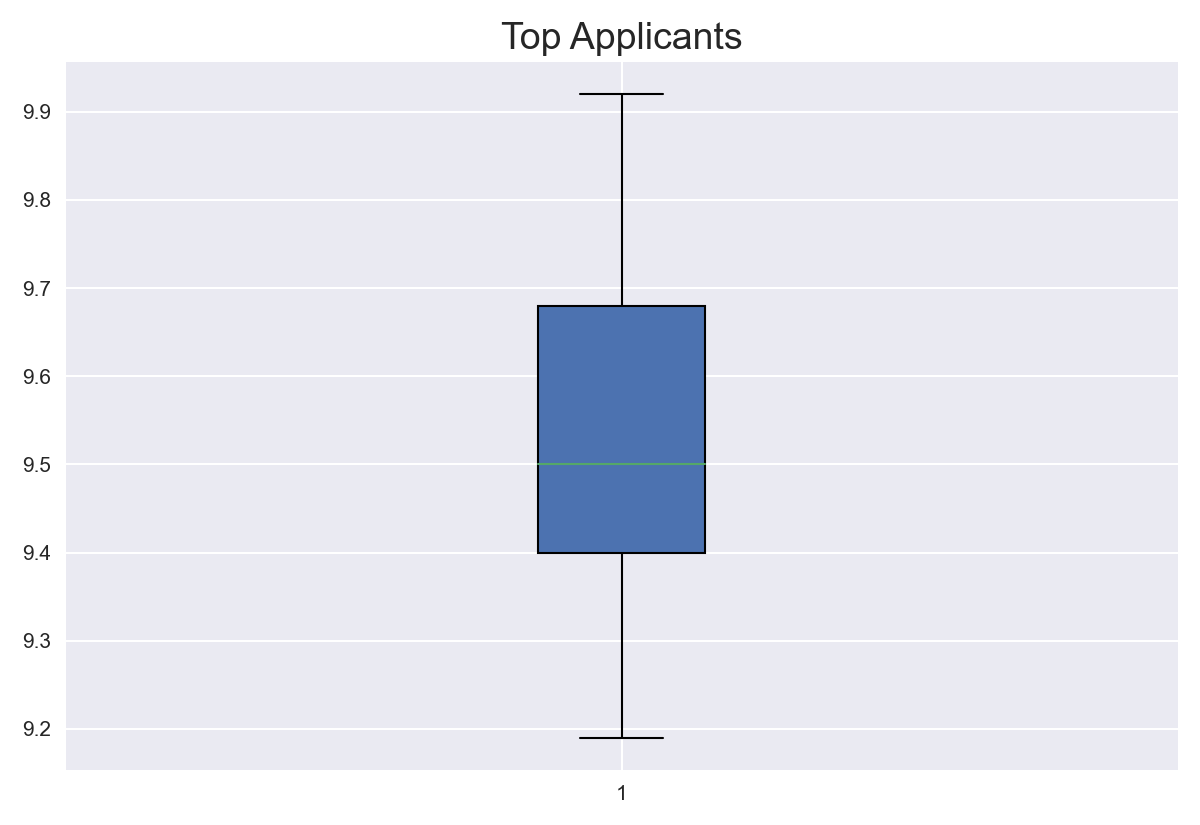

In [4]:
df.columns=df.columns.str.strip()
df_new=df[df['Chance of Admit']>0.9]
plt.figure()
plt.boxplot(df_new['CGPA'] , patch_artist=True)
plt.title('Top Applicants' , fontsize=18)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


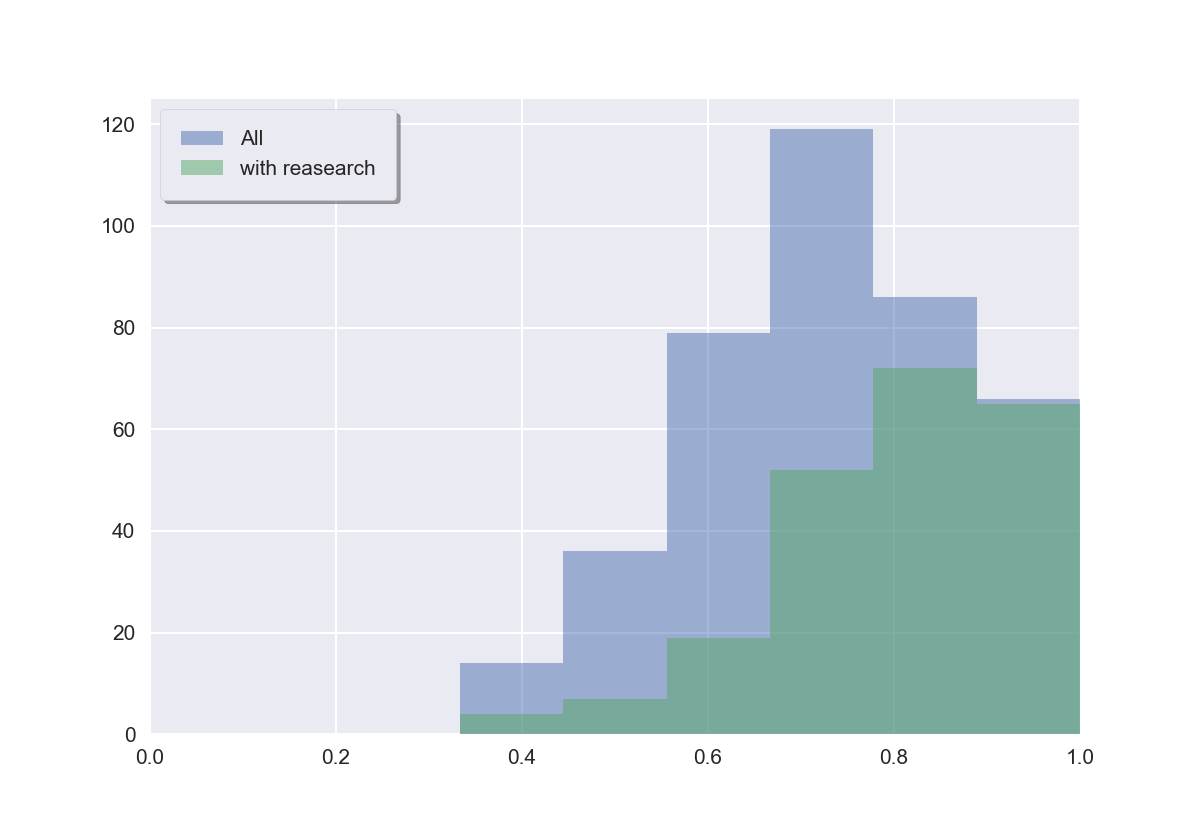

In [5]:
plt.figure()
plt.style.use('seaborn-deep')

bins=np.linspace(0,1,10)
plt.hist(df['Chance of Admit'] ,bins , alpha=0.5,label='All')
plt.hist(df[df['Research']==1]['Chance of Admit'],bins , alpha=0.5 , label='with reasearch')
plt.xlim([0,1])
plt.legend(loc='upper left' ,frameon=True,fancybox=True, framealpha=1, shadow=True, borderpad=True)
plt.show()

<IPython.core.display.Javascript object>


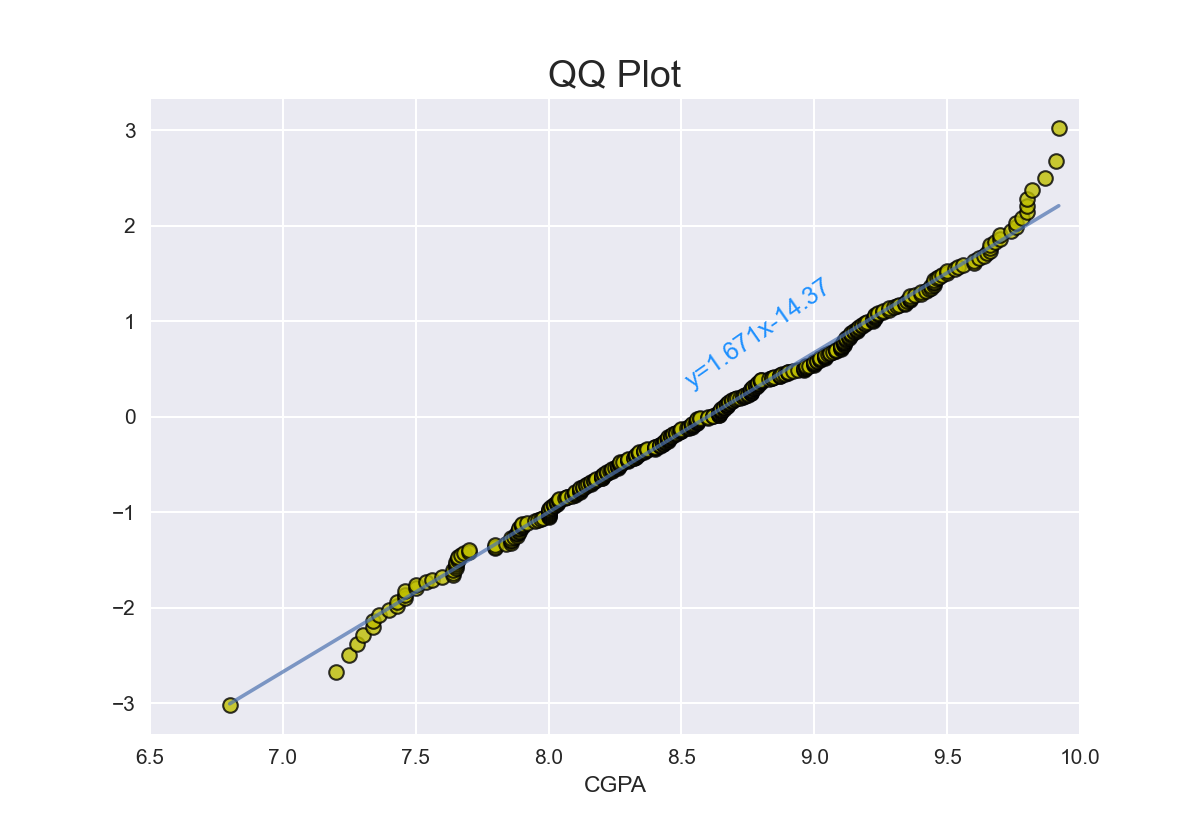

In [6]:
from scipy.stats import norm

GPA=df['CGPA'].to_frame().sort_values('CGPA' , ascending=True).reset_index().drop('index',axis=1)
length=len(GPA)
stdev=np.std(GPA['CGPA'])
average=np.mean(GPA['CGPA'])
GPA['index']=GPA.index+1
GPA['Scaled']=norm.ppf((GPA['index']-0.5)/length)
plt.figure()
plt.scatter(GPA['CGPA'] , GPA['Scaled'],edgecolor='black' , linewidth=1 ,alpha=0.8 , color='y')


m, b = np.polyfit(GPA['CGPA'] , GPA['Scaled'], 1)
plt.plot(GPA['CGPA'] , m*GPA['CGPA']+b , alpha=0.7)
plt.title('QQ Plot',fontsize=18)
plt.xlabel('CGPA')
plt.xlim([6.5,10])
plt.text(8.5 ,0.3 , r'y=1.671x-14.37' , rotation=35,color='dodgerblue' , fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


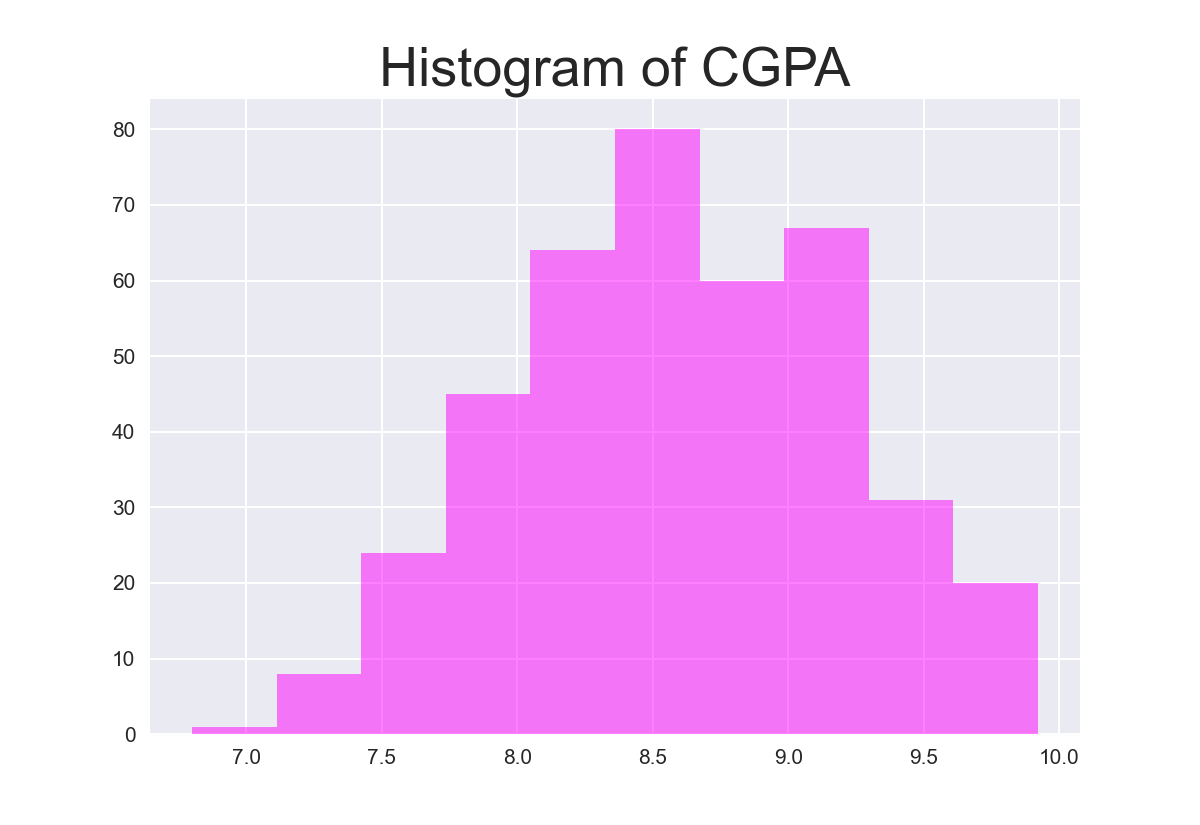

In [7]:
plt.figure()
plt.hist(GPA['CGPA'],bins=10 , alpha=0.5  , color='magenta')
plt.title('Histogram of CGPA',fontsize=26)
plt.show()